In [65]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import csv
import math
from collections import Counter

In [12]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

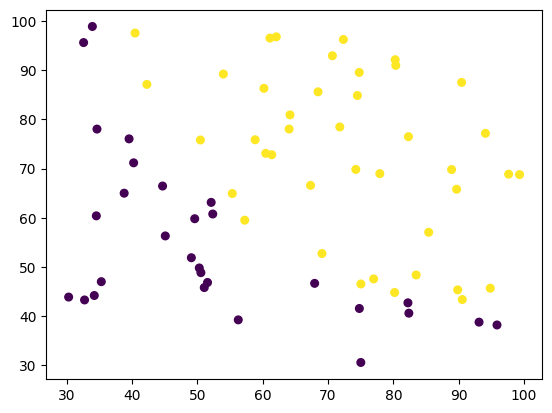

In [13]:
fig = plt.figure(1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=30)

In [57]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    collection = []
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    for i, x in enumerate(X):
        dist = math.dist(x, example)
        collection.append((dist, y[i]))
    # 2. posortuj kolekcję względem dystansów, rosnąco
    collection.sort(key=lambda a: a[0])
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    k_shortest_dist = collection[:k]
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem
    return(Counter(k_shortest_dist).most_common(1)[0][0][1])

In [69]:
for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    y_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
    print(accuracy_score(y_test, y_pred))
    print(y_pred)
    print(confusion_matrix(y_test, y_pred))

0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0.]
[[10  1]
 [ 1 18]]
0.9333333333333333
[1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 

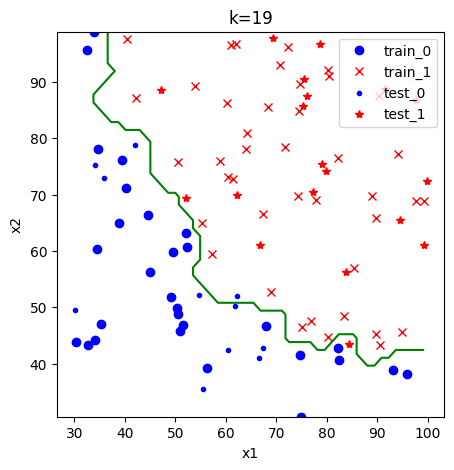

In [59]:
# setup plot
plt.figure(figsize=(5, 5))
plt.title(f'k={k}')
plt.xlabel('x1')
plt.ylabel('x2')

# prepare data for contour plot
x1_res = 50
x2_res = 50
x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
x1x1, x2x2 = np.meshgrid(x1, x2)
x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
labels_space = np.zeros((x1_res, x2_res))
for row_idx in range(x2_res):
    for col_idx in range(x1_res):
        example = np.array([x1[col_idx], x2[row_idx]])
        pred = classify(x_train, y_train, example, k)
        labels_space[row_idx, col_idx] = pred
# plot decision boundary
plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

# plot training set
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

# plot test set
plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])